# Bank Marketing Data Set
## Trabajo Final

==================================================================

**David Zapata Vásquez**  
dazapatava@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

------------------------------------------------------------------
El conjunto de datos puede descargarse de [UCI Machine Learning Repository](http://mlr.cs.umass.edu/ml/datasets/Bank+Marketing#)

Click [aquí](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/) para descargar el archivo .csv directamente.

# Definición del problema real

Se desea determinar con una campaña de mercadeo si el cliente suscribirá (yes / no) un depósito a plazo (variable y), con base a la información del resto de variables. Dichas variables que están divididas en 3 grupos:

- **Cliente**: edad, tipo de trabajo, estado civil, nivel de educación, crédito por defecto, crédito hipotecario y crédito de libre inversión.

- **Campaña**: contacto, último día de contacto, último mes de contacto, duración del contacto

- **Otros**: number of contacts performed in current campaign, number of days that passed by after the client was last contacted, number of contacts performed before this campaign, outcome of previous campaign, and whether a client has subscribed a term deposit

La necesidad del banco es impulsar la campaña de adquisición de depósitos a plazos para tener mayores recursos para el resto del portafolio del banco, al tener depósitos a plazo fijo el banco sabe con qué recursos cuenta por cierto periodo de tiempo, lo que hace que pueda diversificar sus opciones de inversión y generar mayores utilidades

# Definición del problema en términos de datos

Los datos están relacionados con las campañas de marketing directo de un banco de Portugal. Estas campañas se basaron en llamadas telefónicas. A menudo, se requirió más de un contacto para el mismo cliente, para saber si se suscribiría ('yes') o no ('no') al producto (depósito a plazo bancario).

Se tiene una muestra de 4521 clientes que contienen 16 atributos y una variable de salida (la que define si el cliente tomó o no el depósito a plazo). 

Los atributos contienen la siguiente información:

#### Atributos con información del cliente del banco:
* age (edad) - numérico
* job (tipo de trabajo) - categórico ("admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
* marital (estado civil) - categórico ("married","divorced","single"; nota: "divorced" puede ser divorciado/a o viudo/a)
* education (nivel de educación) - categórico ("unknown","secondary","primary","tertiary")
* default (crédito por defecto) - binario ("yes","no")
* balance (balance promedio anual en Euros) - numérico
* housing (¿tiene crédito hipotecario?) - binario ("yes","no")
* loan (¿tiene crédito libre invesión?) - binario ("yes","no")

#### Atributos relacionados con el último contacto al cliente 
* contact (medio por el que se hizo el contacto) - categórico ("unknown","telephone","cellular")
* day (último día del mes que se contactó al cliente) - numérico
* month (último mes que se contactó al cliente) - categórico ("jan", "feb", "mar", ..., "nov", "dec")
* duration (duración del último contacto con el cliente) - numérico

#### Otros atributos
* campaign (número de veces que se contactó al cliente durante la campaña) - numérico (incluye TODAS las veces que se contactó al cliente)
* pdays (número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior) - numérico
* previous (número de veces que se contactó al cliente antes de la campaña actual) - numérico (si es "-1", significa que nunca se había contactado al cliente)
* poutcome (resultado después del contacto con el cliente durante la campaña anterior) - categórico ("unknown","other","failure","success")

#### Variable de salida
* y (¿se suscribió el cliente al depósito a plazo?) - binario ("yes","no")


# Exploración

In [2]:
#Carga de los datos
Bankmkt <- read.csv("bank.csv", sep= ";")

In [5]:
str(Bankmkt)

'data.frame':	4521 obs. of  17 variables:
 $ age      : int  30 33 35 30 59 35 36 39 41 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 11 8 5 5 2 5 7 10 3 8 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 2 3 2 2 3 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 1 2 3 3 2 3 3 2 3 1 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1787 4789 1350 1476 0 747 307 147 221 -88 ...
 $ housing  : Factor w/ 2 levels "no","yes": 1 2 2 2 2 1 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 2 1 1 1 1 1 2 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 1 1 1 3 3 1 1 1 3 1 ...
 $ day      : int  19 11 16 3 5 23 14 6 14 17 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 11 9 1 7 9 4 9 9 9 1 ...
 $ duration : int  79 220 185 199 226 141 341 151 57 313 ...
 $ campaign : int  1 1 1 4 1 2 1 2 2 1 ...
 $ pdays    : int  -1 339 330 -1 -1 176 330 -1 -1 147 ...
 $ p

In [6]:
 summary(Bankmkt)

      age                 job          marital         education    default   
 Min.   :19.00   management :969   divorced: 528   primary  : 678   no :4445  
 1st Qu.:33.00   blue-collar:946   married :2797   secondary:2306   yes:  76  
 Median :39.00   technician :768   single  :1196   tertiary :1350             
 Mean   :41.17   admin.     :478                   unknown  : 187             
 3rd Qu.:49.00   services   :417                                              
 Max.   :87.00   retired    :230                                              
                 (Other)    :713                                              
    balance      housing     loan           contact          day       
 Min.   :-3313   no :1962   no :3830   cellular :2896   Min.   : 1.00  
 1st Qu.:   69   yes:2559   yes: 691   telephone: 301   1st Qu.: 9.00  
 Median :  444                         unknown  :1324   Median :16.00  
 Mean   : 1423                                          Mean   :15.92  
 3rd Qu.

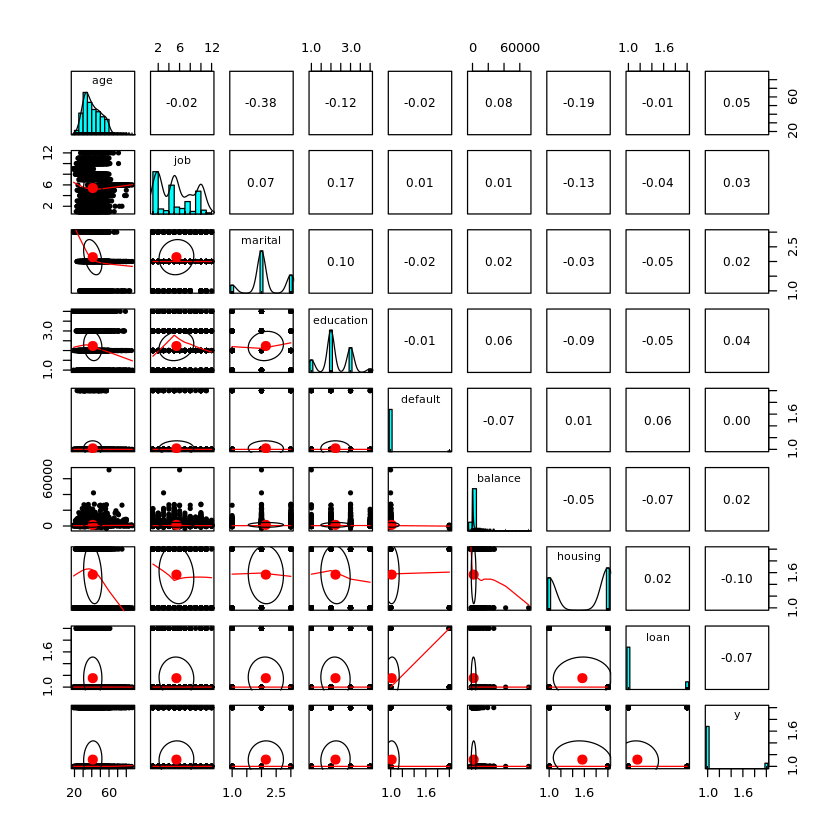

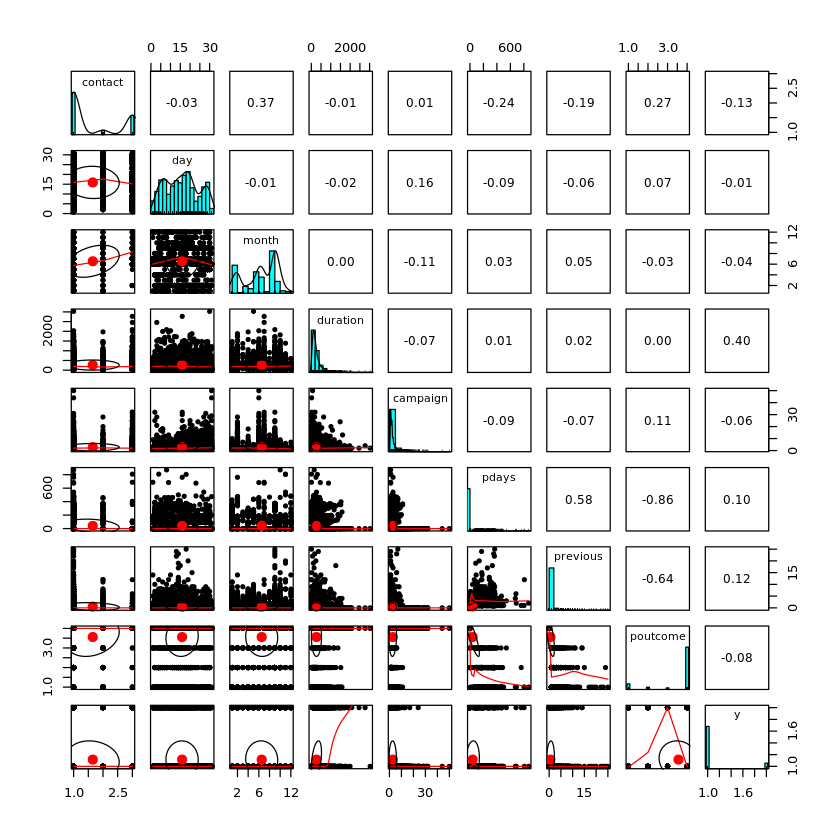

In [7]:
library(psych)
pairs.panels(Bankmkt[, c(1:8,17)])
pairs.panels(Bankmkt[, c(9:17)])

Con la primera parte de la información se puede ver la cantidad y tipo de datos que se tiene en este data set, las 16 variables de entrada. También se tiene la información del contenido de cada una de las variables, para las categóricas y binarias cómo es su distribución, y de las cuantitativas se puede ver sus valores máximos, mínimos, media, moda...

Además con la información de las dos últimas gráficas se puede ver todas las correlaciones que tienen las variables de entrada con la de salida. Se puede apreciar que las que están relacionadas con **Campaña** son de las que más afectan.

In [8]:
library(corrplot)
library(psych)

corrplot 0.84 loaded

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [10]:
bank_cor <- Bankmkt

for(i in 1:ncol(bank_cor)){
  
  bank_cor[,i]<- as.integer(bank_cor[,i])
}

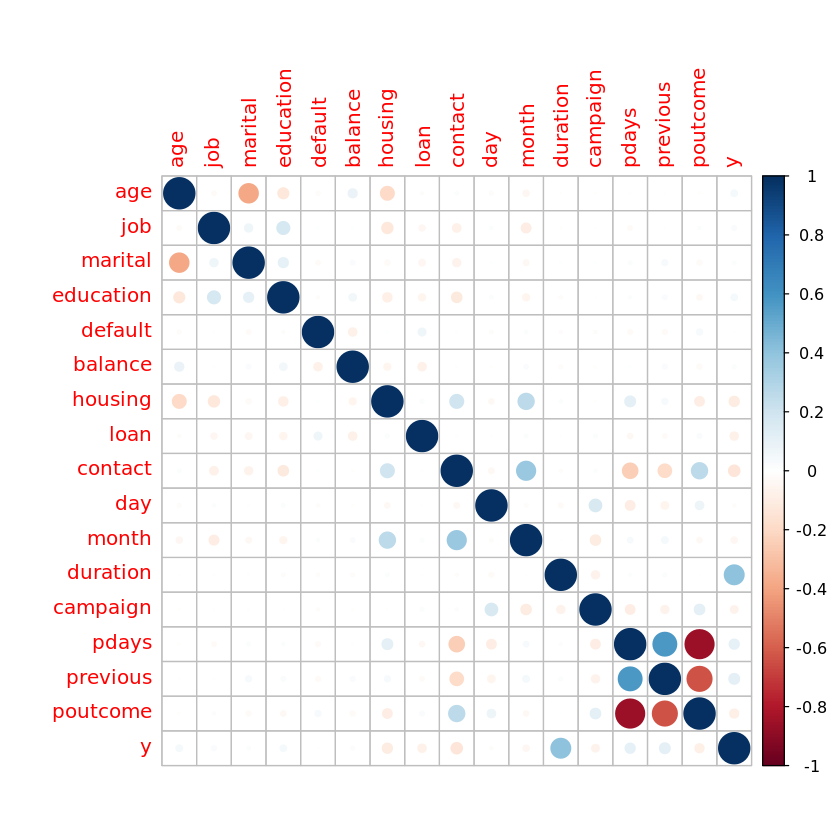

In [11]:
corrplot(cor(bank_cor))

Como se puede observar en la gráfica anterior las varibles *pdays*, *previous* y *poutcome* están altamente correlacionadas con la variable de salida.

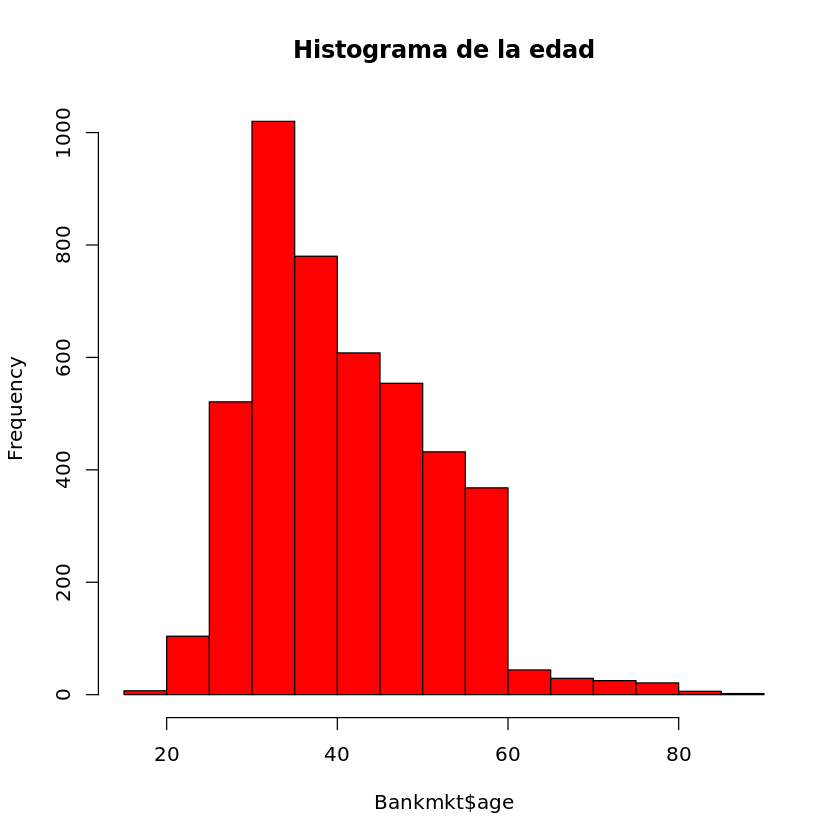

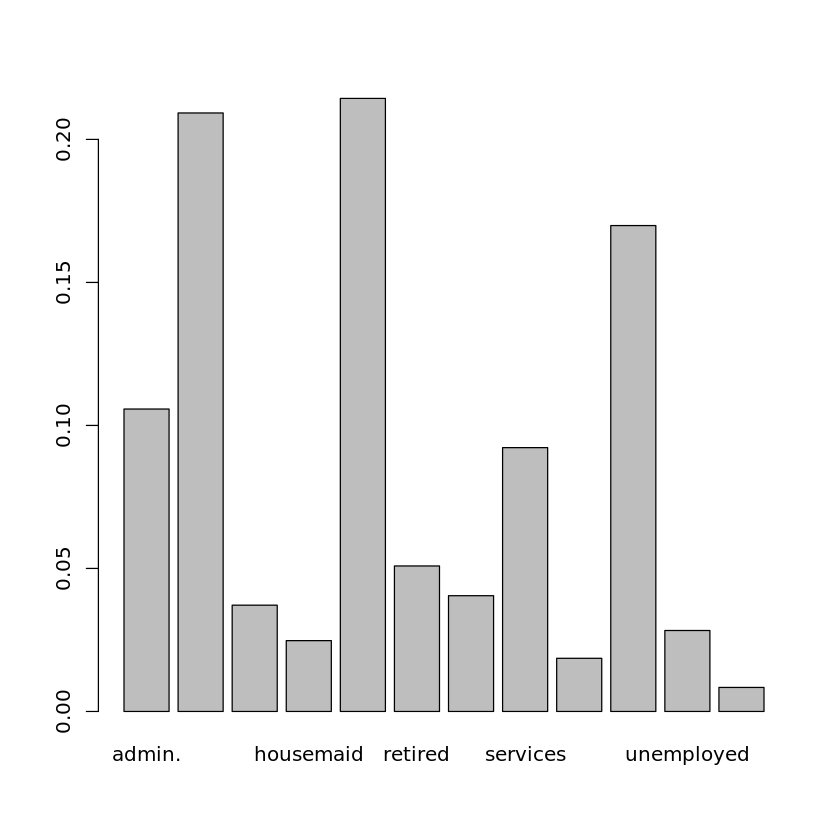

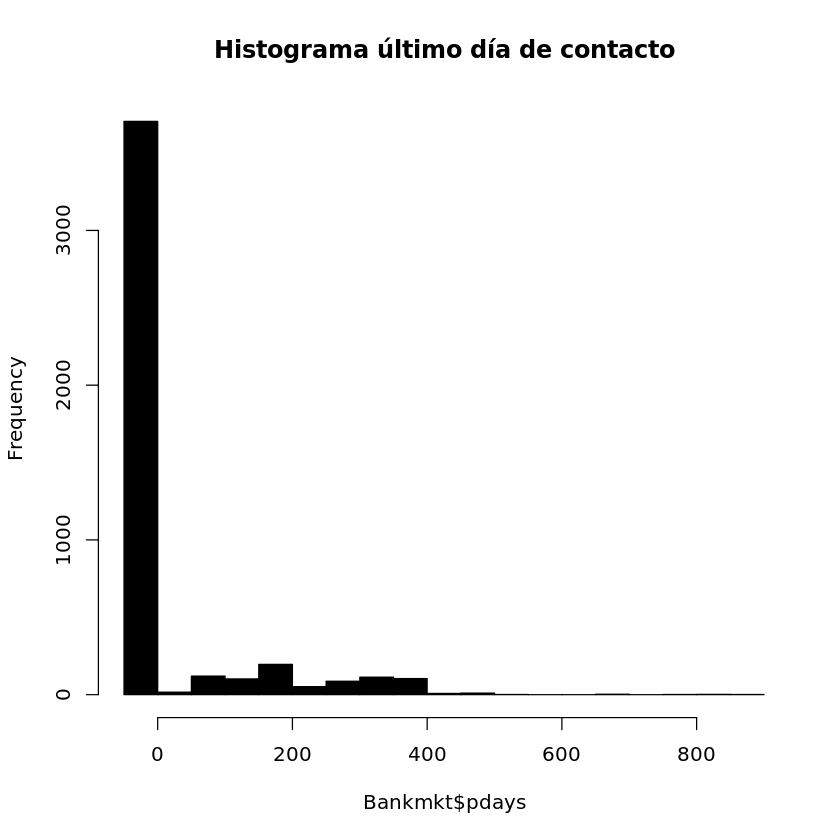

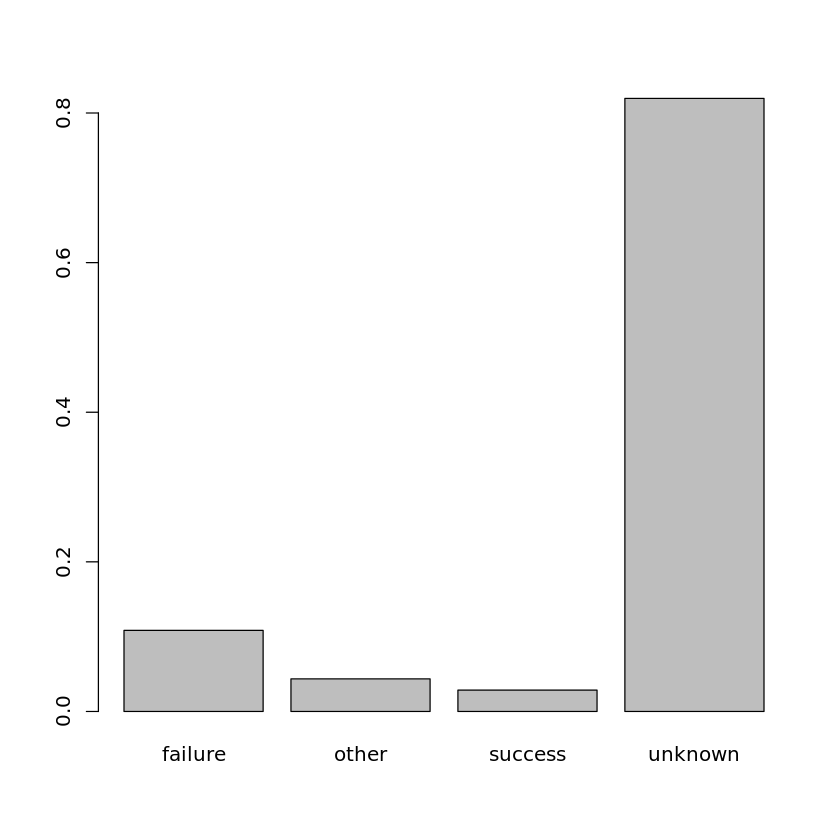

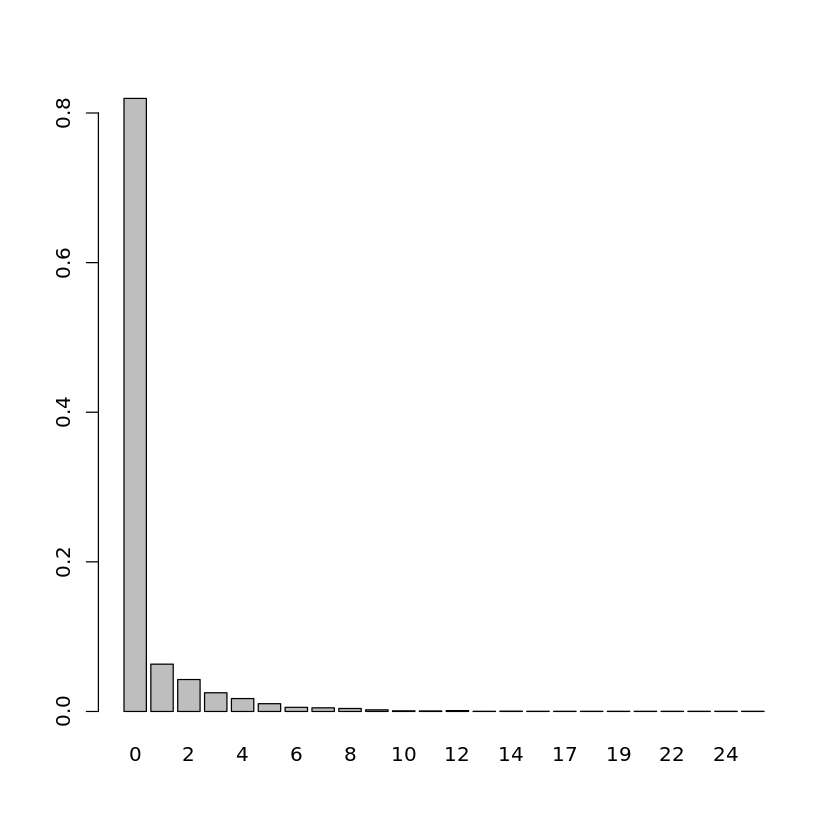

In [16]:
hist(Bankmkt$age, main="Histograma de la edad",col = 2)
barplot(prop.table(table(Bankmkt$job)))
hist(Bankmkt$pdays, main="Histograma último día de contacto", col = 1)
barplot(prop.table(table(Bankmkt$poutcome)))
barplot(prop.table(table(Bankmkt$previous)))


## Preparación de los datos

In [15]:
## Se extrae la última columna que contiene la variable de salida
y = Bankmkt$y
x = Bankmkt[,1:16]

In [16]:
## Se extrae una muestra aleatoria con un 80% de los datos (80% de los datos como entrenamiento, 20% restante para prueba)
sample <- sample(1:nrow(x), 3617)
str(sample)

 int [1:3617] 515 2813 2754 2817 3889 2892 43 1050 3007 2321 ...


In [17]:
## Se crean conjunto de entrenamiento y testeo para aplicar en los modelos
train_x <- x[sample,]
test_x <- x[-sample,]
train_y <- y[sample]
test_y <- y[-sample]

In [75]:
train <- Bankmkt[sample,]
test <- Bankmkt[-sample,]

## Modelo OneR

In [86]:
library(OneR)
oner <- OneR(train_y ~ ., data = train_x, verbose = TRUE)
oner

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
“data contains unused factor levels”


    Attribute Accuracy
1 * poutcome  89.93%  
2   duration  88.38%  
3   age       87.5%   
4   month     87.39%  
5   job       87.28%  
5   marital   87.28%  
5   education 87.28%  
5   default   87.28%  
5   balance   87.28%  
5   housing   87.28%  
5   loan      87.28%  
5   contact   87.28%  
5   day       87.28%  
5   campaign  87.28%  
5   pdays     87.28%  
5   previous  87.28%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'




Call:
OneR.formula(formula = train_y ~ ., data = train_x, verbose = TRUE)

Rules:
If poutcome = failure then train_y = no
If poutcome = other   then train_y = no
If poutcome = success then train_y = yes
If poutcome = unknown then train_y = no

Accuracy:
813 of 904 instances classified correctly (89.93%)


In [87]:
summary(oner)


Call:
OneR.formula(formula = train_y ~ ., data = train_x, verbose = TRUE)

Rules:
If poutcome = failure then train_y = no
If poutcome = other   then train_y = no
If poutcome = success then train_y = yes
If poutcome = unknown then train_y = no

Accuracy:
813 of 904 instances classified correctly (89.93%)

Contingency table:
       poutcome
train_y failure other success unknown Sum
    no     * 93  * 33       4   * 659 789
    yes      10     9    * 28      68 115
    Sum     103    42      32     727 904
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 172.3, df = 3, p-value < 2.2e-16



In [88]:
ypred1 <- predict(oner, test_x)

In [89]:
table(test_y, ypred1)

print("Accuracy= 89,2%")

      ypred1
test_y   no  yes
   no  3169   42
   yes  351   55

[1] "Accuracy= 89,2%"


## Modelo C50

In [90]:
## Con este modelo se entrenan muchos árboles simultáneamente sobre los datos con Adaptive Boosting cuando hay un nuevo ejemplo, 
## cada árbol pronóstica la clase y la clasificación final se obtiene por mayoría
library(C50)
c50 <- C5.0(train_x, train_y, trials=20)
c50


Call:
C5.0.default(x = train_x, y = train_y, trials = 20)

Classification Tree
Number of samples: 904 
Number of predictors: 16 

Number of boosting iterations: 20 
Average tree size: 5.8 

Non-standard options: attempt to group attributes


In [91]:
summary(c50)


Call:
C5.0.default(x = train_x, y = train_y, trials = 20)


C5.0 [Release 2.07 GPL Edition]  	Thu Apr 12 20:01:30 2018
-------------------------------

Class specified by attribute `outcome'

Read 904 cases (17 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

poutcome = success: yes (32/4)
poutcome in {failure,other,unknown}:
:...duration <= 636: no (795/47)
    duration > 636:
    :...marital in {divorced,single}: yes (31/8)
        marital = married: no (46/17)

-----  Trial 1:  -----

Decision tree:

duration <= 288: no (536.7/71.4)
duration > 288:
:...contact in {cellular,telephone}: yes (281.5/116.7)
    contact = unknown: no (85.8/25.5)

-----  Trial 2:  -----

Decision tree:

poutcome in {failure,other,unknown}: no (862/232.2)
poutcome = success: yes (42/11.5)

-----  Trial 3:  -----

Decision tree:

month in {dec,mar,oct}: yes (60.4/12.2)
month in {apr,aug,feb,jan,jul,jun,may,nov,sep}:
:...duration <= 674: no (682.2/194)
    duration > 674: yes (161.4/4

In [94]:
ypred2 <- predict(c50, test_x)

library(gmodels)
CrossTable(test_y,
          ypred2,
          prop.chisq = FALSE,
          prop.c = FALSE,
          prop.r = FALSE,
          dnn= c('actual default', 'predicted default'))

print("Accuracy = 89,4%")


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  3617 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |      3104 |       107 |      3211 | 
               |     0.858 |     0.030 |           | 
---------------|-----------|-----------|-----------|
           yes |       273 |       133 |       406 | 
               |     0.075 |     0.037 |           | 
---------------|-----------|-----------|-----------|
  Column Total |      3377 |       240 |      3617 | 
---------------|-----------|-----------|-----------|

 
[1] "Accuracy = 89,4%"


## Modelo NaiveBayes

In [95]:
library(e1071)
naibay <- naiveBayes(train_x, 
                    train_y)

In [96]:
naibay


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = train_x, y = train_y)

A-priori probabilities:
train_y
       no       yes 
0.8727876 0.1272124 

Conditional probabilities:
       age
train_y     [,1]      [,2]
    no  40.05323  9.868923
    yes 43.98261 12.420260

       job
train_y      admin. blue-collar entrepreneur   housemaid  management
    no  0.111533587 0.221799747  0.038022814 0.031685678 0.210392902
    yes 0.069565217 0.208695652  0.034782609 0.017391304 0.243478261
       job
train_y     retired self-employed    services     student  technician
    no  0.032953105   0.034220532 0.101394170 0.021546261 0.154626109
    yes 0.104347826   0.017391304 0.069565217 0.008695652 0.200000000
       job
train_y  unemployed     unknown
    no  0.039290241 0.002534854
    yes 0.017391304 0.008695652

       marital
train_y  divorced   married    single
    no  0.1140684 0.6261090 0.2598226
    yes 0.2000000 0.5652174 0.2347826

       education
train_y   

In [98]:
ypred3 <- predict(naibay, test_x)
CrossTable(ypred3,
          test_y,
          prop.chisq = FALSE,
          prop.t = FALSE,
          dnn = c('predicted', 'actual'))

print("Accuracy = 88,6%")


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  3617 

 
             | actual 
   predicted |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |      2922 |       222 |      3144 | 
             |     0.929 |     0.071 |     0.869 | 
             |     0.910 |     0.547 |           | 
-------------|-----------|-----------|-----------|
         yes |       289 |       184 |       473 | 
             |     0.611 |     0.389 |     0.131 | 
             |     0.090 |     0.453 |           | 
-------------|-----------|-----------|-----------|
Column Total |      3211 |       406 |      3617 | 
             |     0.888 |     0.112 |           | 
-------------|-----------|-----------|-----------|

 
[1] "Accuracy = 88,6%"


## Modelo GLM

In [79]:
log.model1 <- glm(train_y ~ ., data=train_x, family = binomial(link='logit'))
summary(log.model1)


Call:
glm(formula = train_y ~ ., family = binomial(link = "logit"), 
    data = train_x)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0302  -0.3517  -0.2075  -0.1158   3.3322  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -3.750e+00  1.552e+00  -2.416 0.015702 *  
age                 2.421e-02  1.802e-02   1.343 0.179119    
jobblue-collar      2.097e-01  5.861e-01   0.358 0.720440    
jobentrepreneur    -2.841e-01  9.500e-01  -0.299 0.764885    
jobhousemaid       -1.761e+00  1.257e+00  -1.401 0.161229    
jobmanagement      -1.591e-01  6.551e-01  -0.243 0.808173    
jobretired          6.705e-01  8.400e-01   0.798 0.424754    
jobself-employed   -9.088e-01  1.165e+00  -0.780 0.435406    
jobservices        -5.518e-01  7.568e-01  -0.729 0.465930    
jobstudent         -2.197e+00  2.138e+00  -1.027 0.304231    
jobtechnician       6.116e-01  5.758e-01   1.062 0.288184    
jobunemployed      -9.422e-01  1.020e

In [19]:
exp(coef(log.model1))

(Intercept)                age     jobblue-collar    jobentrepreneur 
        0.02352305         1.02451022         1.23335689         0.75268838 
      jobhousemaid      jobmanagement         jobretired   jobself-employed 
        0.17193205         0.85294729         1.95526301         0.40301483 
       jobservices         jobstudent      jobtechnician      jobunemployed 
        0.57591194         0.11117518         1.84331634         0.38975942 
        jobunknown     maritalmarried      maritalsingle educationsecondary 
        1.19645120         0.34328412         0.35846670         1.44358340 
 educationtertiary   educationunknown         defaultyes            balance 
        2.14791802         3.60460846         0.76283545         0.99985960 
        housingyes            loanyes   contacttelephone     contactunknown 
        1.36652750         0.47480893         0.74190706         0.13131470 
               day           monthaug           monthdec           monthfeb 
        1.01447183         0.41661921         6.50064967         0.98425216 
          monthjan           monthjul           monthjun           monthmar 
        0.18749023         0.18212492         1.67656727         5.99588460 
          monthmay           monthnov           monthoct           monthsep 
        0.86076113         0.38442882         1.73312528         0.30319655 
          duration           campaign              pdays           previous 
        1.00449791         0.96362595         0.99573883         0.97634077 
     poutcomeother    poutcomesuccess    poutcomeunknown 
        3.87412370       281.42219521         1.10428935

In [84]:
ypred4 <- predict(log.model1, newdata=test_x, type = "response")
table(test_y, ypred4>= 0.5)

print("Accuracy = 89,7 %")

      
test_y FALSE TRUE
   no   3111  100
   yes   273  133

[1] "Accuracy = 89,7 %"


## Comparación de modelos

Para comparar los modelos, se compararán las medidas de error de cada uno:

#### Precisión
- Modelo 1 (OneR) = **89,2%**
- Modelo 2 (C50) = **89,4%**
- Modelo 3 (Naive Bayes) = **88,6%** 
- Modelo 4 (GML) = **89,7%**

#### Sensibilidad
- Modelo 1 (OneR) = **0,9869**
- Modelo 2 (C50) = **0,9666**
- Modelo 3 (Naive Bayes) = **0,9293** 
- Modelo 4 (GML) = **0,9688**

#### Especificidad
- Modelo 1 (OneR) = **0,1354**
- Modelo 2 (C50) = **0,3275**
- Modelo 3 (Naive Bayes) = **0,2646** 
- Modelo 4 (GML) = **0,3275**

Según lo anterior, el mejor modelo es el 4. Dado que es el que presenta mejor precisión, sensibilidad y especificidad que el resto de modelos. Seguido por le modelo 2, que tiene resultados muy similares al anterior, pero es superado por poco.